In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

# Función que establece las fronteras 

In [11]:
# matrx --> matriz de n x n
# n     --> dimensión de la matriz

def fronteras(matrx, n):
    
    matrx[0: n, 0]     = 0
    matrx[0: n, n - 1] = 0
    matrx[0, 0: n]     = 0
    matrx[n - 1, 0: n] = 0
    
    return matrx

# Función que crea la matriz aleatoria de ceros y unos

In [12]:
# n --> dimensión de la matriz

def aleatoria(n):
    
    A = np.random.randint(0, 2, (n, n))
    
    A = fronteras(A, n)
    
    return A

# Función que toma una matriz aleatoria, y para cada celda, captura los estados de las celdas vecinas

In [13]:
# A --> matriz de n x n
# n --> dimensión de la matriz

def states(A, n):

    B1 = np.roll(A, (1, 0), axis = (1, 0))     # Captura celda a izquierda
    B2 = np.roll(A, (- 1, 0), axis = (1, 0))   # Captura celda a derecha
    B3 = np.roll(A, (1, 0), axis = (0, 1))     # Captura celda arriba
    B4 = np.roll(A, (- 1, 0), axis = (0, 1))   # Captura celda abajo
    B5 = np.roll(A, (1, 1), axis = (1, 0))     # Captura celda diag sup izq
    B6 = np.roll(A, (- 1, 1), axis = (1, 0))   # Captura celda diag sup der
    B7 = np.roll(A, (- 1, - 1), axis = (1, 0)) # Captura celda diag inf der
    B8 = np.roll(A, (1, - 1), axis = (1, 0))   # Captura celda diag inf der

    suma = B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8
    
    suma = fronteras(suma, n)
    
    return suma

# Función que establece los parámetros para determinar si una celda pasa a estar activa o no

In [14]:
# A --> matriz de n x n
# T --> matriz suma total de estados (celdas vecinas activas)
# n --> dimensión de la matriz

def play(A, T, n):
    
    for i in range(n):
    
        for j in range(n):

            if A[i, j] == 0 and T[i, j] == 3:
        
                A[i, j] = 1
        
            elif A[i, j] == 0 and T[i, j] != 3:
            
                A[i, j] = 0
        
            elif A[i, j] == 1 and (T[i, j] == 2 or T[i, j] == 3):
            
                A[i, j] = 1
                        
            elif A[i, j] == 1 and (T[i, j] > 3 or T[i, j] < 2):
                
                A[i, j] = 0     
                
    return A

# Función que permite evolucionar en el tiempo el estado de cada celda, determina algunos parámetros estadísticos de las celdas y la matriz en general, y exporta un video con la evolución del sistema

In [15]:
# t --> Cantidad de pasos para la evolución del sistema (generaciones)
# n --> dimensión de la matriz

def movie(t, n):

    A = aleatoria(n)
    
    images = []
    popltn = []
    perc_l = []
    perc_d = []
    aver   = np.zeros((n, n))
    
    fig, ax = plt.subplots()
    
    for i in range(t):
    
        suma = states(A, n)
    
        A = play(A, suma, n)
        
        popltn.append(np.sum(A))
        perc_l.append(popltn[i] * 100 / (n * n))
        perc_d.append(100 - perc_l[i])
        aver = aver + A

        title = ax.text(0.5,1.05, r'Población: {:.0f}, Generación {:.0f}' .format(n * n, i), 
                        size = plt.rcParams['axes.titlesize'],
                        ha = 'center', transform = ax.transAxes)
    
        map_c = colors.ListedColormap(['black', 'white'])
        im = plt.imshow(A, animated = True, cmap = map_c)  
        images.append([im, title])

    plt.xticks([])    
    plt.yticks([])
    
    ani = animation.ArtistAnimation(fig, images, interval = 500, blit = True, repeat_delay = 0)

    ani.save('life_game.mp4', dpi = 500)
    
    plt.savefig('fig1.png', dpi = 1000, quality = 99, transparent = True)
    plt.show()
    
    return perc_l, perc_d, aver

# Parámetros iniciales y ejecución

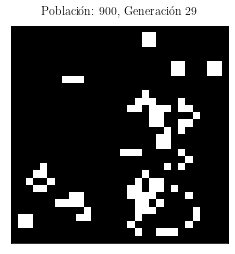

In [16]:
t = 30
n = 30

pp1, pp2, average = movie(t, n)

# Gráfica de barras (porcentaje de celdas activas -- azul-- y muertas --naranja-- en función de la cantidad de días)

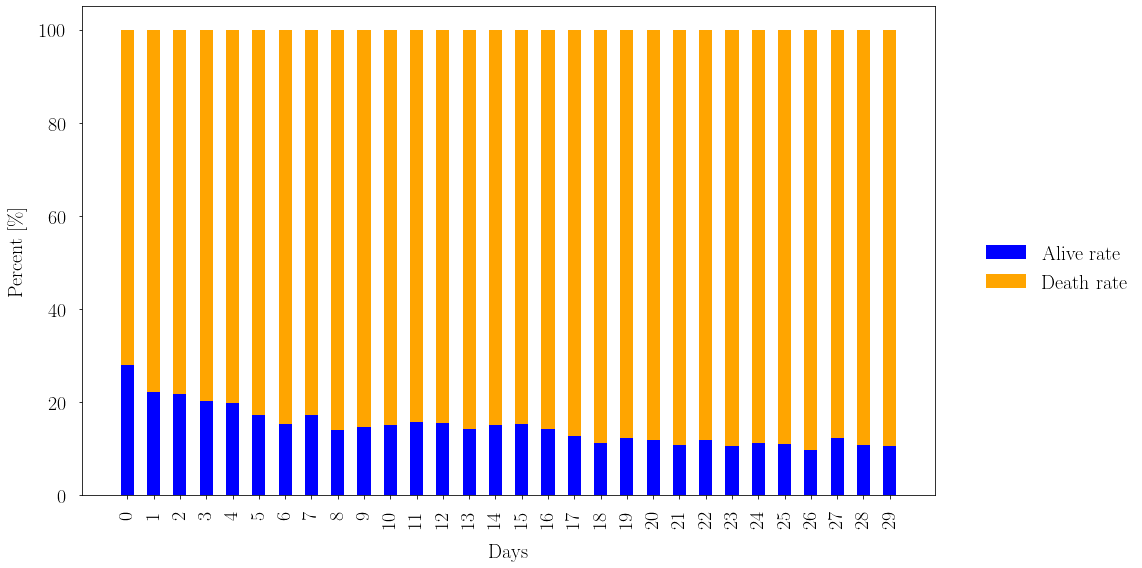

In [17]:
fig1, axx = plt.subplots(figsize = (16, 8))

axx.bar(range(t), pp1, label = r'Alive rate', color = 'blue', width = 0.5)
axx.bar(range(t), pp2, bottom = pp1, label = r'Death rate', color = 'orange', width = 0.5)

plt.legend(frameon = False, loc = (1.05, 0.4), fontsize = 20)
plt.xlabel(r'Days', fontsize = 20, labelpad = 14)
plt.ylabel(r'Percent $\left[\%\right]$', fontsize = 20, labelpad = 12)
plt.xticks(range(t), rotation = 90)
plt.xticks(fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', pad = 12)
plt.yticks(fontsize = 20)

fig1.tight_layout()
plt.savefig('fig2.png', dpi = 1000, quality = 99, transparent = True)
plt.show()

# Gráfica de promedio de celdas activas

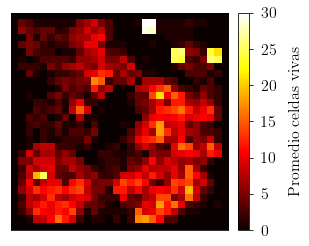

In [18]:
fig, ax1 = plt.subplots()

im = ax1.imshow(average, cmap = 'hot')

cb = plt.colorbar(im, pad = 0.03)
plt.xticks([])    
plt.yticks([])
cb.set_label(r'Promedio celdas vivas', color = 'black', labelpad = 12, fontsize = 16)
cb.ax.tick_params(labelsize = 16, pad = 8)
plt.savefig('fig3.png', dpi = 1000, quality = 99, transparent = True)
plt.show()